In [1]:
from config import host
from config import username
from config import password

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
engine = create_engine(f'postgresql://{username}:{password}@{host}:5432/SQL_Challenge')
connection = engine.connect()

In [3]:
# Check to make sure connection worked
engine.table_names()

['employees',
 'salaries',
 'titles',
 'departments',
 'department_employee',
 'department_manager']

In [4]:
# Create DataFrames
employees_df = pd.read_sql("SELECT * FROM Employees", connection)
salary_df = pd.read_sql("SELECT * FROM Salaries", connection)
title_df = pd.read_sql("SELECT * FROM Titles", connection)

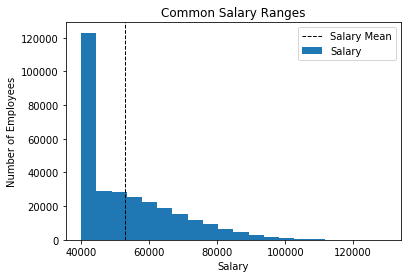

In [7]:
# Create a histogram to visualize the most common salary ranges for employees
plt.hist(salary_df['salary'], 20, density=False, label="Salary")
plt.axvline(salary_df['salary'].mean(), color='k', linestyle='dashed', linewidth=1, label="Salary Mean")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.legend() 
plt.title("Common Salary Ranges")
plt.savefig("Common Salary Ranges.png")

In [24]:
merged= employees_df.merge(salary_df, how= "inner")
merged= merged.rename(columns= {"emp_title_id": "title_id"})
merged

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772


In [25]:
merged= merged.merge(title_df, how= "inner")
merged

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,72446,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,71148,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,60026,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,40000,Manager


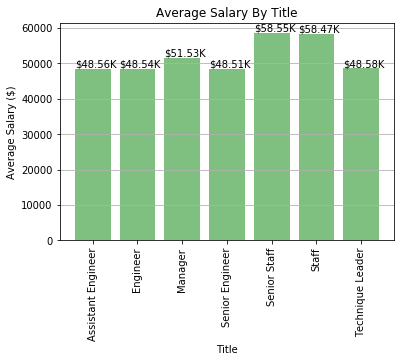

In [37]:
# Create a bar chart of average salary by title
# Group by the titles
avg_salaries_by_title = merged.groupby(["title"]).mean()["salary"]

#Create Bar Chart
title_list = avg_salaries_by_title.index
avg_salary_for_title = avg_salaries_by_title.values
x_axis = np.arange(len(title_list))

chart = plt.bar(x_axis, avg_salary_for_title, color="g", alpha=0.5, align="center")

for i in chart:
    yvalue = i.get_height()
    plt.text(i.get_x(), yvalue + 500, "${:,.2f}K".format(yvalue/1000))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, title_list, rotation=90)
plt.xlabel("Title")
plt.ylabel("Average Salary ($)")
plt.title("Average Salary By Title")
plt.grid(axis="y")
plt.savefig("Avg_Salary_by_Title.png")
plt.show()